In [53]:
import warnings
warnings.filterwarnings("ignore")


import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, roc_curve, auc,\
precision_score

from keras.layers import LSTM, Dense, Dropout
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler


In [3]:
dataset = pd.read_csv('../input/Fraud/backup.csv')

In [4]:
dataset = dataset.drop('Unnamed: 0', axis = 1)
dataset = pd.get_dummies(dataset,prefix=['type'])

In [5]:
X = dataset.drop("isFraud",1)
y = dataset.isFraud

In [6]:
RandomState = 42


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

In [7]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

<AxesSubplot:>

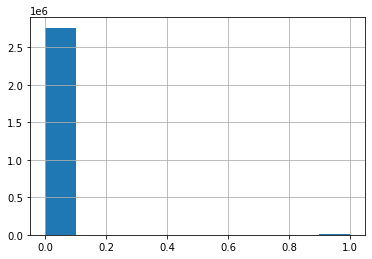

In [8]:
dataset.isFraud.hist()

In [9]:
n_features = X_train.shape[1]

In [10]:
print("Train Size: {}".format(len(X_train)))
print("Val Size: {}".format(len(X_val)))
print("Test Size: {}".format(len(X_test)))
print("No of Features: {}".format(n_features))

Train Size: 1243636
Val Size: 612538
Test Size: 914235
No of Features: 11


In [57]:
model = keras.models.Sequential()

model.add(LSTM(units=128, return_sequences = True, input_shape = (X_train.shape[1],1)))


model.add(LSTM(units=64, return_sequences = True)


# Add a Dense layer with 10 units.
#model.add(Dense(units=1))

model.summary()

SyntaxError: invalid syntax (<ipython-input-57-3b3a6e2d3dd4>, line 12)

In [35]:
model.compile(optimizer='adam', loss=tf.losses.binary_crossentropy, metrics=['accuracy'])

In [ ]:
def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.5
    epochs_drop = 5
    lrate = initial_lrate * (drop**((1 + epoch)/epochs_drop))
    return lrate

lrate_scheduler = LearningRateScheduler(step_decay)
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
model_chkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

# model fitting
model.fit(X_train, y_train, batch_size=512, epochs=10, validation_data=(X_val, y_val))#, callbacks=[early_stop, model_chkpoint, lrate_scheduler])

In [46]:
X.shape

(2770409, 11)